In [1]:
import re
import tensorflow as tf
import pandas as pd
import numpy as np
import rubrix as rb
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [2]:
data_labelled = pd.read_csv("D:\Downloads\Twitter_Emotion_Dataset_with_label.csv")

In [3]:
snorkel_data = pd.read_csv("D:\Downloads\Snorkel_dataset_v7.csv")

In [258]:
merged_data= pd.read_csv("D:\Downloads\Twitter_Emotion_Dataset_with_label_Merged.csv")

In [2]:
snorkel_data_20 = pd.read_csv("D:\Downloads\Snorkel_dataset_with_20_test.csv")

In [19]:
snorkel_data_20['tweet'].iloc[2990]

'Apa menariknya agama Buku rujukan tapi sok tau Tak ada hal baru Tak ada mantra penemuan terbaru yang lebih mustajab untuk mengatasi masalah Rumusan mantranya tetap kuno Mantra yang namanya sapu jagat apa bermanfaat saat Covid Bila ada yang marah pasti penganutnya'

In [5]:
snorkel_data_20['label'].value_counts()

0    1183
4     675
1     543
3     479
2     420
Name: label, dtype: int64

In [6]:
gb_num_words=1000
gb_output_dim=50
gb_epochs=30
gb_n_hidden_layers=25
gb_trainable=False
gd_dense = 5
gb_test_size=0.2

In [7]:
con=open("D:\Downloads\glove_50dim_wiki.id.case.text.txt",encoding='utf-8')

In [8]:
index={}
for words in con:
    values=words.split()
    word=values[0]
    vect=np.asarray(values[1:],dtype='float32')
    index[word]=vect

In [61]:
x=snorkel_data_20['tweet']
y=snorkel_data_20['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)


In [10]:
data_labelled['label'] = data_labelled['label'].replace(['happy', 'anger', 'sadness', 'fear', 'love'],[0, 1, 2, 3, 4]  )
data_labelled

label                                              tweet
0         1  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...
1         1  Sesama cewe lho (kayaknya), harusnya bisa lebi...
2         0  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3         1  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...
4         0  Sharing pengalaman aja, kemarin jam 18.00 bata...
...     ...                                                ...
4396      4  Tahukah kamu, bahwa saat itu papa memejamkan m...
4397      3  Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398      1  5. masa depannya nggak jelas. lha iya, gimana ...
4399      0  [USERNAME] dulu beneran ada mahasiswa Teknik U...
4400      2  Ya Allah, hanya Engkau yang mengetahui rasa sa...

[4401 rows x 2 columns]

In [314]:
merged_data['label'] = merged_data['label'].replace(['happy', 'anger', 'sadness', 'fear', 'love'],[0, 1, 2, 3, 4]  )
merged_data

label                                              tweet
0        1  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...
1        1  Sesama cewe lho (kayaknya), harusnya bisa lebi...
2        0  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3        1  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...
4        0  Sharing pengalaman aja, kemarin jam 18.00 bata...
...    ...                                                ...
7696     0                                Happy birthday boss
7697     0  Yeayy Alhamdulillah lazada pecah telor today s...
7698     3                            kaget lebih ke takut si
7699     2                                        Astaga lupa
7700     0  Dengan senang hati kami informasikan Untuk jam...

[7701 rows x 2 columns]

In [298]:
merged_data.shape

(7701, 2)

In [70]:
x=data_labelled['tweet']
y=data_labelled['label']
X_train_normal, X_test_normal, y_train_normal, y_test_normal=train_test_split(x,y,test_size=gb_test_size,random_state=100)


In [387]:
merged_data_80 = merged_data.sample(frac=0.885)


In [388]:
X_train_normal

1639    Terima kasih [USERNAME] Sudah memberi pelita p...
547     Kmren cerita2 sama tmen FIK [USERNAME] yg ceri...
2032    Hidup di jaman Naow ini kalau hanya pengen di ...
1252    ih wowo saya pemaf kok tapi maaf saya pendenda...
4128    asli parno bgt kebangun ada bunyi2 deket telin...
                              ...                        
4149    Disini tempat ternyaman,  Melihat seberapa Ind...
1890    Abis take away beberapa menu Tulung Agung Pasa...
350     [USERNAME] [USERNAME] .... Ini aja membuktikan...
79      [USERNAME] [USERNAME] [USERNAME] [USERNAME] Ma...
3927    yang, aku aja inget :") malah kemaren siapa ya...
Name: tweet, Length: 3520, dtype: object

In [71]:
combined_X_train = pd.concat([snorkel_data_20['tweet'], X_train_normal], axis=0, ignore_index=True)


In [72]:
combined_y_train = pd.concat([snorkel_data_20['label'], y_train_normal], axis=0, ignore_index=True)


In [15]:
combined_X_train.shape

(6820,)

In [16]:

combined_y_train.shape

(6820,)

In [17]:
X_test_normal.shape

(881,)

In [18]:
y_test_normal.shape

(881,)

In [73]:
enc=LabelEncoder()
tokens=Tokenizer(num_words=gb_num_words)

In [74]:
tokens.fit_on_texts(combined_X_train)
combined_X_train = tokens.texts_to_sequences(combined_X_train)
X_test_normal = tokens.texts_to_sequences(X_test_normal)

In [75]:
combined_y_train= enc.fit_transform(combined_y_train)
y_test_normal= enc.transform(y_test_normal)

In [18]:
x_train = pad_sequences(x_train)
X_test_normal = pad_sequences(X_test_normal)

In [67]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [407]:
combined_X_train

array([[[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 

In [408]:
combined_y_train


array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [76]:
from tensorflow.keras.utils import to_categorical


combined_y_train=to_categorical(combined_y_train)
y_test_normal=to_categorical(y_test_normal)
combined_X_train=pad_sequences(combined_X_train,maxlen=16)
X_test_normal=pad_sequences(X_test_normal,maxlen=16)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import LabelEncoder

model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,
                    weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [78]:
history = model.fit(combined_X_train, combined_y_train, epochs=gb_epochs, validation_data=(X_test_normal, y_test_normal), batch_size=32)

Epoch 1/30
214/214 [==============================] - 4s 10ms/step - loss: 1.4467 - accuracy: 0.3889 - val_loss: 1.4416 - val_accuracy: 0.3564
Epoch 2/30
214/214 [==============================] - 2s 8ms/step - loss: 1.2525 - accuracy: 0.4811 - val_loss: 1.3840 - val_accuracy: 0.4257
Epoch 3/30
214/214 [==============================] - 2s 8ms/step - loss: 1.1415 - accuracy: 0.5337 - val_loss: 1.3628 - val_accuracy: 0.4347
Epoch 4/30
214/214 [==============================] - 2s 11ms/step - loss: 1.0629 - accuracy: 0.5836 - val_loss: 1.3357 - val_accuracy: 0.4461
Epoch 5/30
214/214 [==============================] - 2s 9ms/step - loss: 0.9958 - accuracy: 0.6211 - val_loss: 1.3109 - val_accuracy: 0.4722
Epoch 6/30
214/214 [==============================] - 2s 9ms/step - loss: 0.9389 - accuracy: 0.6496 - val_loss: 1.3076 - val_accuracy: 0.4745
Epoch 7/30
214/214 [==============================] - 2s 8ms/step - loss: 0.8971 - accuracy: 0.6655 - val_loss: 1.2903 - val_accuracy: 0.4904
Epoc

In [79]:
results_lstm_1=pd.DataFrame(model.history.history)
results_lstm_1

loss  accuracy  val_loss  val_accuracy
0   1.446710  0.388856  1.441603      0.356413
1   1.252465  0.481085  1.383994      0.425653
2   1.141476  0.533724  1.362822      0.434733
3   1.062903  0.583578  1.335692      0.446084
4   0.995792  0.621114  1.310906      0.472191
5   0.938938  0.649560  1.307571      0.474461
6   0.897146  0.665543  1.290312      0.490352
7   0.856128  0.683284  1.297633      0.489217
8   0.821554  0.700733  1.290316      0.503973
9   0.788855  0.712757  1.270278      0.509648
10  0.765340  0.726686  1.298392      0.497162
11  0.745353  0.731965  1.314630      0.491487
12  0.727038  0.732991  1.290358      0.500568
13  0.709324  0.745015  1.274014      0.519864
14  0.691590  0.752493  1.270742      0.518729
15  0.677323  0.758211  1.276353      0.503973
16  0.659447  0.763343  1.278511      0.510783
17  0.654132  0.764516  1.258922      0.502838
18  0.633157  0.769501  1.286402      0.519864
19  0.622906  0.774780  1.278429      0.516459
20  0.608296  0.780499  1.295338      0.515324
21  0.601044  0.786070  1.315735      0.515324
22  0.587271  0.789736  1.322232      0.508513
23  0.580175  0.791202  1.301896      0.517594
24  0.566262  0.798240  1.345447      0.514188
25  0.559627  0.797361  1.341362      0.508513
26  0.548075  0.801906  1.343586      0.509648
27  0.541350  0.808211  1.330401      0.507378
28  0.528875  0.808798  1.355813      0.509648
29  0.524948  0.813636  1.389240      0.499432

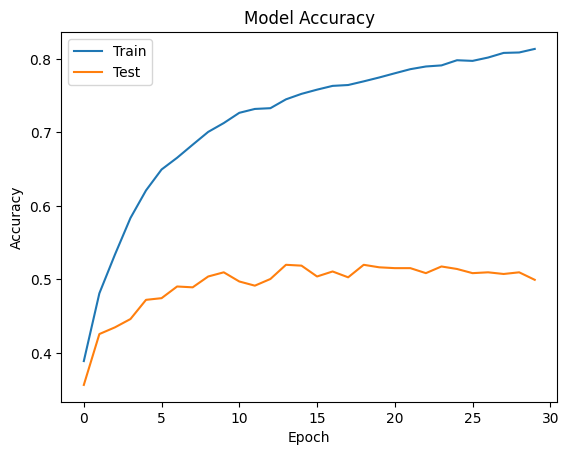

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

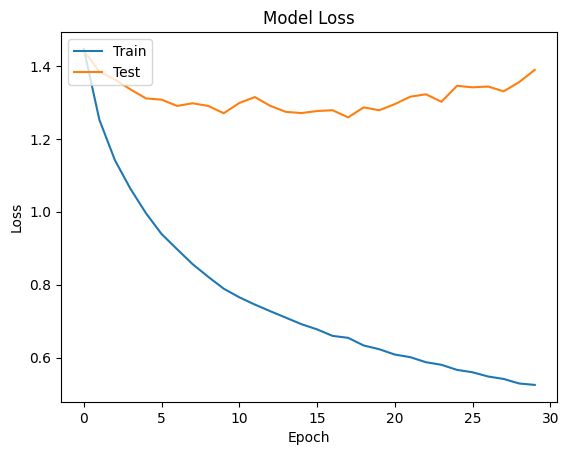

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()